In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-12-08 18:11:08.086391: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 18:11:08.162460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 18:11:08.162501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 18:11:08.164864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 18:11:08.174864: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 18:11:08.175872: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 10s 1us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

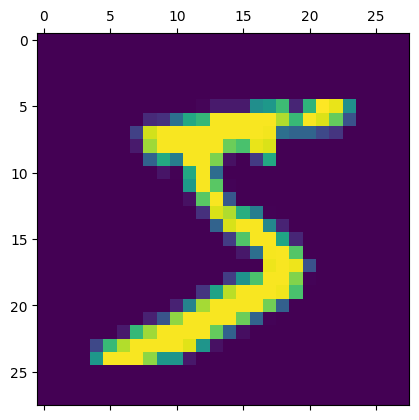

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-12-08 18:12:53.617180: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4722 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9254


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2706 - accuracy: 0.9260


[0.2706364691257477, 0.9259999990463257]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.72859687e-02, 8.15986994e-07, 5.75926714e-02, 9.67503369e-01,
       2.10183929e-03, 1.18794955e-01, 1.76330525e-06, 9.99839008e-01,
       1.11050136e-01, 5.63367069e-01], dtype=float32)

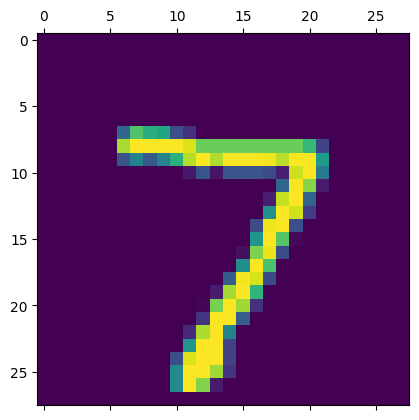

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    5,    2,    1,    1,    0],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   9,   11,  920,   13,    7,    4,   13,   11,   42,    2],
       [   5,    0,   20,  910,    0,   32,    3,   12,   22,    6],
       [   2,    1,    8,    0,  926,    0,    7,    4,   11,   23],
       [  11,    3,    4,   22,   10,  793,   11,    6,   28,    4],
       [  15,    3,    8,    1,    7,   11,  908,    2,    3,    0],
       [   2,   11,   21,    6,    8,    1,    0,  958,    2,   19],
       [  10,   11,    6,   17,    9,   27,    8,   12,  869,    5],
       [  11,    7,    1,    9,   40,    8,    0,   35,    8,  890]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

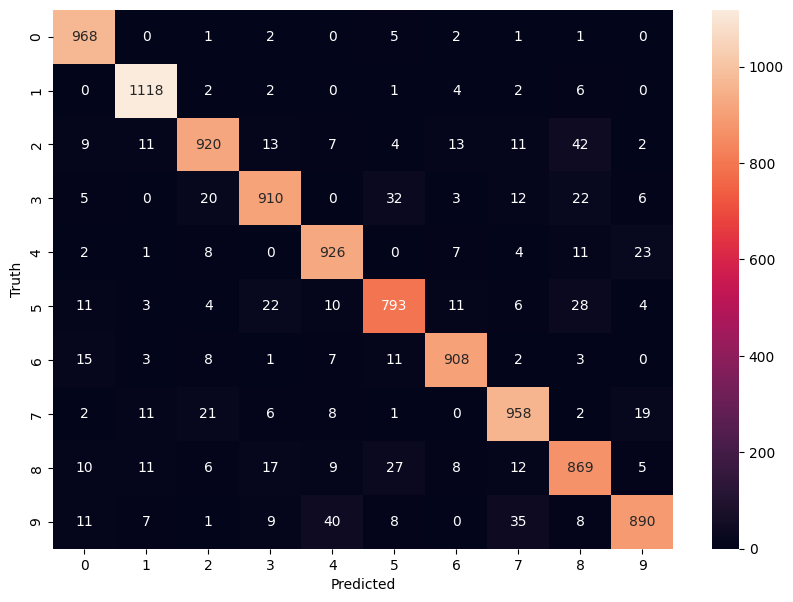

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-12-08 18:15:36.853110: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.9190
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1266 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9838


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0799 - accuracy: 0.9749


[0.07989256083965302, 0.9749000072479248]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

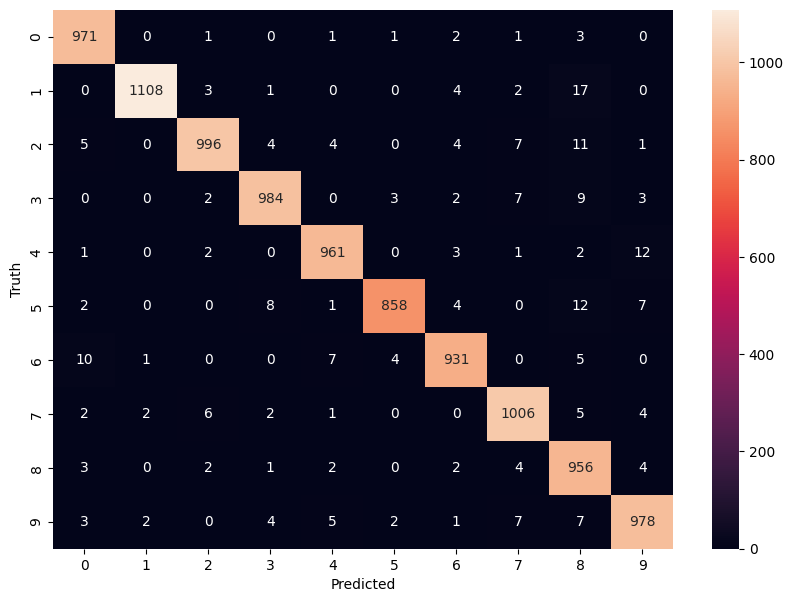

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
import joblib
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
joblib.dump(model, "digit_model_nn")

Epoch 1/10


2023-12-08 18:17:40.872946: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0338 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0195 - accurac

['digit_model_nn']

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0815 - accuracy: 0.9784


[0.08145380020141602, 0.9783999919891357]